# **GETTING DEPENDENCIES**

In [1]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk # to  work with human language data for applying in statistical natural language processing (NLP)
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer # removing the commoner morphological and inflexional endings from words in English
from nltk.corpus import stopwords # words that are so common they are basically ignored by typical tokenizers


In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Akshay
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Akshay
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Akshay
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **READING DATA**

In [3]:
# Importing Data
df = pd.read_csv("Combined_News_DJIA.csv")
df.shape

(1989, 27)

In [4]:
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

# **DATA CLEANING**

Data cleaning involves removal of duplicates, null values and empty strings. It also includes removal of incorrect and wrongly formatted data

In [5]:
print("Length before removal of duplicates : " + str(len(df)))

Length before removal of duplicates : 1989


In [6]:
df.drop_duplicates(inplace = True) # Removing duplicates to prevent model overfitting later

In [7]:
print("Length after removal of duplicates : " + str(len(df)))

Length after removal of duplicates : 1989


In [8]:
df.isnull().sum() # checking for null values

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [9]:
df.dropna(inplace = True) # Remove missing values and Keep the DataFrame with valid entries in the same variable.

In [10]:
print("Length after removal of null values : " + str(len(df)))

Length after removal of null values : 1986


In [11]:
df.isnull().sum() # check for null values again

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

# **DATA PRESENTATION**

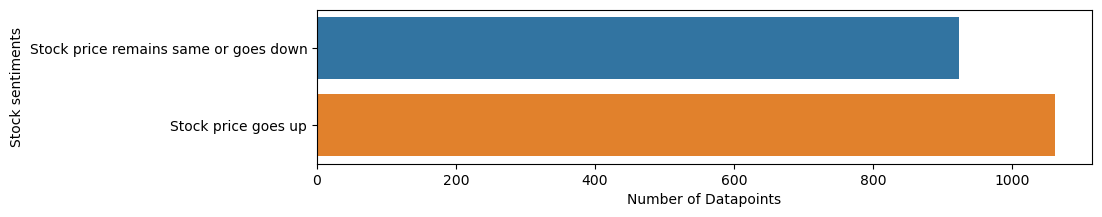

In [12]:
# data visualization by plotting the counts of each label
plt.figure(dpi=100,figsize=(10,2))
sns.countplot(data=df,y='Label')
plt.xlabel('Number of Datapoints')
plt.ylabel('Stock sentiments')
plt.yticks([0, 1], ['Stock price remains same or goes down', 'Stock price goes up'])
plt.show()

In [13]:
top1_lengths = [len(i) for i in list(df['Top1'])]
top2_lengths = [len(i) for i in list(df['Top2'])]
top3_lengths = [len(i) for i in list(df['Top3'])]
top4_lengths = [len(i) for i in list(df['Top4'])]
top5_lengths = [len(i) for i in list(df['Top5'])]
top6_lengths = [len(i) for i in list(df['Top6'])]
top7_lengths = [len(i) for i in list(df['Top7'])]
top8_lengths = [len(i) for i in list(df['Top8'])]
top9_lengths = [len(i) for i in list(df['Top9'])]
top10_lengths = [len(i) for i in list(df['Top10'])]
top11_lengths = [len(i) for i in list(df['Top11'])]
top12_lengths = [len(i) for i in list(df['Top12'])]
top13_lengths = [len(i) for i in list(df['Top13'])]
top14_lengths = [len(i) for i in list(df['Top14'])]
top15_lengths = [len(i) for i in list(df['Top15'])]
top16_lengths = [len(i) for i in list(df['Top16'])]
top17_lengths = [len(i) for i in list(df['Top17'])]
top18_lengths = [len(i) for i in list(df['Top18'])]
top19_lengths = [len(i) for i in list(df['Top19'])]
top20_lengths = [len(i) for i in list(df['Top20'])]
top21_lengths = [len(i) for i in list(df['Top21'])]
top22_lengths = [len(i) for i in list(df['Top22'])]
top23_lengths = [len(i) for i in list(df['Top23'])]
top24_lengths = [len(i) for i in list(df['Top24'])]
top25_lengths = [len(i) for i in list(df['Top25'])]
lengths = [top1_lengths, top2_lengths, top3_lengths, top4_lengths, top5_lengths, top6_lengths, top7_lengths, top8_lengths, top9_lengths, top10_lengths,
           top11_lengths, top12_lengths, top13_lengths, top14_lengths, top15_lengths, top16_lengths, top17_lengths, top18_lengths, top19_lengths, top20_lengths,
           top21_lengths, top22_lengths, top23_lengths, top24_lengths, top25_lengths]

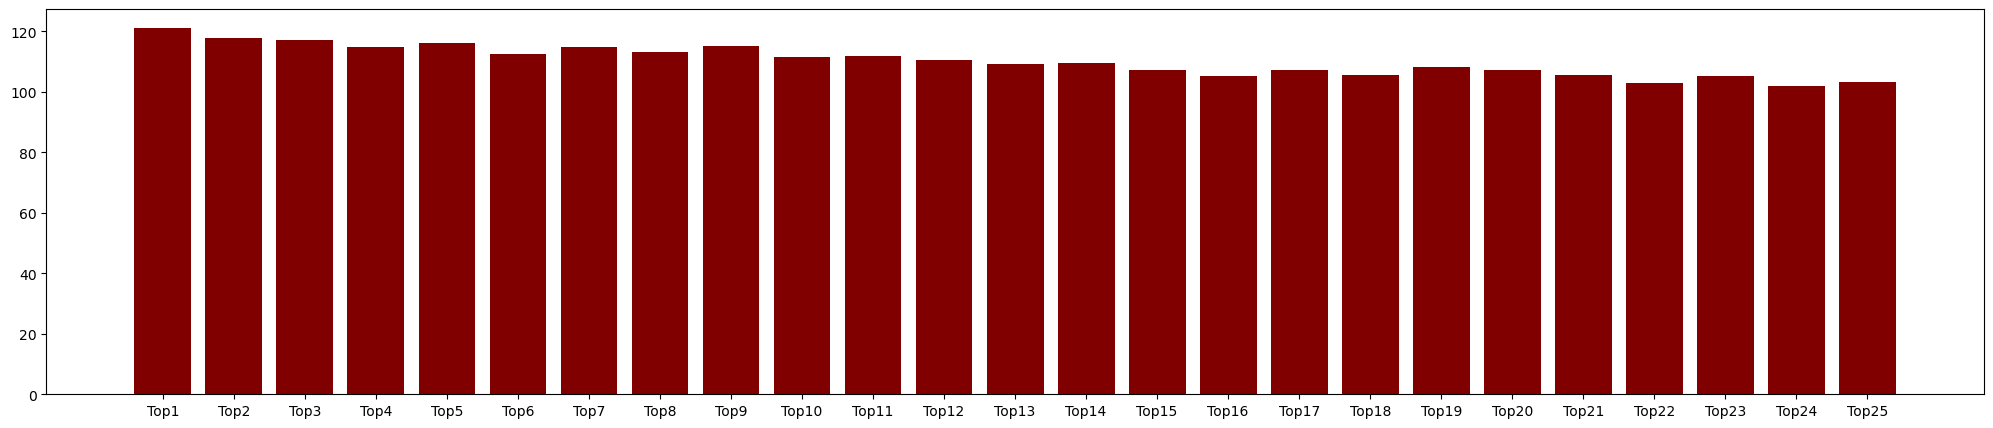

In [14]:
x = []
for i in range(25):
  x.append("Top" + str(i+1))
y = [sum(i)/len(i) for i in lengths]
fig = plt.figure(figsize = (25, 5))
plt.bar(x, y, color ='maroon')
plt.show()

# checking the lengths of the headlines to see whether any specific headline has more impact on the output labels
# if not the top 25 headlines can be merged into a single one before training the model

In [15]:
# Deleting all extra variables created for visualization (for freeing memory)
del top1_lengths 
del top2_lengths 
del top3_lengths 
del top4_lengths 
del top5_lengths 
del top6_lengths 
del top7_lengths 
del top8_lengths 
del top9_lengths 
del top10_lengths 
del top11_lengths 
del top12_lengths 
del top13_lengths 
del top14_lengths 
del top15_lengths 
del top16_lengths 
del top17_lengths 
del top18_lengths 
del top19_lengths 
del top20_lengths 
del top21_lengths 
del top22_lengths 
del top23_lengths 
del top24_lengths 
del top25_lengths 
del lengths

CONCLUSION : 1st graph concludes that data is balanced and the 2nd graph reveals that the 25 different different columns can be merged into a single one

# **DATA PREPROCESSING**

In [16]:
df['headlines'] = df[df.columns[2:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# combining all the top25 headlines into one

In [17]:
df['headlines']

0       b"Georgia 'downs two Russian warplanes' as cou...
1       b'Why wont America and Nato help us? If they w...
2       b'Remember that adorable 9-year-old who sang a...
3       b' U.S. refuses Israel weapons to attack Iran:...
4       b'All the experts admit that we should legalis...
                              ...                        
1984    Barclays and RBS shares suspended from trading...
1985    2,500 Scientists To Australia: If You Want To ...
1986    Explosion At Airport In Istanbul,Yemeni former...
1987    Jamaica proposes marijuana dispensers for tour...
1988    A 117-year-old woman in Mexico City finally re...
Name: headlines, Length: 1986, dtype: object

## Stop Word Removal

In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
def remove_stop_words(text):
  words = text.split()
  cleaned =  [word for word in words if word not in stopwords.words('english')]
  return ' '.join(cleaned)

In [20]:
df['headlines'] = df['headlines'].apply(lambda x: remove_stop_words(x))

## General cleaning

In [21]:
def replace_hyphen_with_space(text):
  return text.replace("-", " ")

def decode_byte_string(text):
  # return text.decode('ASCII')
  text = text.replace('b"', "")
  return text.replace("b'", "")

def remove_punctuation(text):
  return ''.join([words for words in text if words not in string.punctuation])

def remove_urls(text):
  return re.sub('http://\S+|https://\S+', '', text)

def remove_newlines(text):
  return text.replace('\n', ' ')

def remove_multispace(text):
  return re.sub(' +', ' ', text)

def strip_sentences(text):
  return text.strip()


In [22]:
df['headlines'] = df['headlines'].apply(lambda x: x.lower()) # Lowercasing data
df['headlines'] = df['headlines'].apply(lambda x: decode_byte_string(x)) # Decoding byte strings
df['headlines'] = df['headlines'].apply(lambda x: remove_urls(x)) # Removing urls from the headlines before removing punctuations
df['headlines'] = df['headlines'].apply(lambda x: replace_hyphen_with_space(x)) # Converting - to space
df['headlines'] = df['headlines'].apply(lambda x: remove_punctuation(x)) # Removing punctuations from the sentences
df['headlines'] = df['headlines'].apply(lambda x: remove_newlines(x)) # Replacing newline with space
df['headlines'] = df['headlines'].apply(lambda x: remove_multispace(x)) # Replacing multispaces with single space
df['headlines'] = df['headlines'].apply(lambda x: strip_sentences(x)) # Stripping sentences to remove starting and trailing spaces
df['headlines']

0       georgia downs two russian warplanes countries ...
1       why wont america nato help us if wont help us ...
2       remember adorable 9 year old sang opening cere...
3       us refuses israel weapons attack iran reportwh...
4       all experts admit legalise drugs war south ose...
                              ...                        
1984    barclays rbs shares suspended trading tanking ...
1985    2500 scientists to australia if you want to sa...
1986    explosion at airport in istanbulyemeni former ...
1987    jamaica proposes marijuana dispensers tourists...
1988    a 117 year old woman mexico city finally recei...
Name: headlines, Length: 1986, dtype: object

In [23]:
df['headlines'].replace('', np.nan, inplace=True)
df['headlines']

0       georgia downs two russian warplanes countries ...
1       why wont america nato help us if wont help us ...
2       remember adorable 9 year old sang opening cere...
3       us refuses israel weapons attack iran reportwh...
4       all experts admit legalise drugs war south ose...
                              ...                        
1984    barclays rbs shares suspended trading tanking ...
1985    2500 scientists to australia if you want to sa...
1986    explosion at airport in istanbulyemeni former ...
1987    jamaica proposes marijuana dispensers tourists...
1988    a 117 year old woman mexico city finally recei...
Name: headlines, Length: 1986, dtype: object

In [24]:
df.isnull().sum()

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        0
Top24        0
Top25        0
headlines    0
dtype: int64

In [25]:
df.dropna(inplace = True)

In [26]:
print("Length after preliminary cleaning : " + str(len(df)))

Length after preliminary cleaning : 1986


## Stemming and Lemmatization (run any of the 4 sub modules)

In [27]:
def lemmatize_data(text, lemmatizer):
  words = text.split()
  lemmatized = [lemmatizer.lemmatize(str(word)) for word in words]
  return ' '.join(lemmatized)

In [28]:
def stemming(text, stemmer):
  words = text.split()
  stemmed= [stemmer.stem(word) for word in words]
  return ' '.join(stemmed)

### **Only Lemmatization**

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
df['headlines'] = df['headlines'].apply(lambda x: lemmatize_data(x, lemmatizer))

### **Only Stemming**

In [31]:
porter_stemmer = PorterStemmer()

In [32]:
df['headlines'] = df['headlines'].apply(lambda x: stemming(x, porter_stemmer))

### **Stemming then Lemmatization**

In [33]:
porter_stemmer = PorterStemmer()

In [34]:
df['headlines'] = df['headlines'].apply(lambda x: stemming(x, porter_stemmer))

In [35]:
lemmatizer = WordNetLemmatizer()

In [36]:
df['headlines'] = df['headlines'].apply(lambda x: lemmatize_data(x, lemmatizer))

### **Lemmatization then Stemming**

In [37]:
lemmatizer = WordNetLemmatizer()

In [38]:
df['headlines'] = df['headlines'].apply(lambda x: lemmatize_data(x, lemmatizer))

In [39]:
porter_stemmer = PorterStemmer()

In [40]:
df['headlines'] = df['headlines'].apply(lambda x: stemming(x, porter_stemmer))

# **TRAIN - TEST SPLIT**

In [41]:
train_data = df[df['Date'] < '20150101']
test_data = df[df['Date'] > '20141231']

In [42]:
train_data.shape

(1860, 28)

In [43]:
test_data.shape

(378, 28)

# **VECTORIZATION**

In [44]:
cv = CountVectorizer()

In [45]:
cv1 = CountVectorizer(ngram_range=(2,2))

In [46]:
tfidf =  TfidfVectorizer()

In [47]:
tfidf1 =  TfidfVectorizer(ngram_range=(2,2))

# **TRAINING AND PREDICTION**

### **Random Forest Classifier with Count Vectorizer**

In [48]:
x = cv.fit_transform(train_data['headlines'])
y = cv.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf.fit(x, train_data['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [50]:
y_pred = rf_clf.predict(y)

In [51]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
confusion_matrix(test_data['Label'], y_pred)

array([[142,  44],
       [ 17, 175]], dtype=int64)

In [53]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       186
           1       0.80      0.91      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.84      0.84       378
weighted avg       0.85      0.84      0.84       378



In [54]:
rf_acc1 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.84


In [55]:
x = cv1.fit_transform(train_data['headlines'])
y = cv1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf.fit(x, train_data['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [57]:
y_pred = rf_clf.predict(y)

In [58]:
confusion_matrix(test_data['Label'], y_pred)

array([[130,  56],
       [  0, 192]], dtype=int64)

In [59]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [60]:
rf_acc2 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.85


### **Random Forest Classifier with TfIdfVectorizer**

In [61]:
x = tfidf.fit_transform(train_data['headlines'])
y = tfidf.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf.fit(x, train_data['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [63]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
y_pred = rf_clf.predict(y)

In [65]:
confusion_matrix(test_data['Label'], y_pred)

array([[146,  40],
       [ 21, 171]], dtype=int64)

In [66]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       186
           1       0.81      0.89      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



In [67]:
rf_acc3 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.84


In [68]:
x = tfidf1.fit_transform(train_data['headlines'])
y = tfidf1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf.fit(x, train_data['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [70]:
y_pred = rf_clf.predict(y)

In [71]:
confusion_matrix(test_data['Label'], y_pred)

array([[134,  52],
       [ 12, 180]], dtype=int64)

In [72]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       186
           1       0.78      0.94      0.85       192

    accuracy                           0.83       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.83      0.83       378



In [73]:
rf_acc4 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.83


### **SVM Classifier with Count Vectorizer**

In [74]:
x = cv.fit_transform(train_data['headlines'])
y = cv.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
clf = svm.SVC(C=1)
clf.fit(x, train_data['Label'])

SVC(C=1)

In [76]:
clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [77]:
y_pred = clf.predict(y)

In [78]:
confusion_matrix(test_data['Label'], y_pred)

array([[134,  52],
       [  8, 184]], dtype=int64)

In [79]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       186
           1       0.78      0.96      0.86       192

    accuracy                           0.84       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.84      0.84       378



In [80]:
svm_acc1 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.84


In [81]:
x = cv1.fit_transform(train_data['headlines'])
y = cv1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
clf = svm.SVC()
clf.fit(x, train_data['Label'])

SVC()

In [83]:
y_pred = clf.predict(y)

In [84]:
confusion_matrix(test_data['Label'], y_pred)

array([[130,  56],
       [  0, 192]], dtype=int64)

In [85]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [86]:
svm_acc2 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.85


### **SVM Classifier with TfIdf Vectorizer**

In [87]:
x = tfidf.fit_transform(train_data['headlines'])
y = tfidf.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
clf = svm.SVC()
clf.fit(x, train_data['Label'])

SVC()

In [89]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [90]:
y_pred = clf.predict(y)

In [91]:
confusion_matrix(test_data['Label'], y_pred)

array([[131,  55],
       [  3, 189]], dtype=int64)

In [92]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       186
           1       0.77      0.98      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.84      0.84       378
weighted avg       0.87      0.85      0.84       378



In [93]:
svm_acc3 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.85


In [94]:
x = tfidf1.fit_transform(train_data['headlines'])
y = tfidf1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
clf = svm.SVC()
clf.fit(x, train_data['Label'])

SVC()

In [96]:
y_pred = clf.predict(y)

In [97]:
confusion_matrix(test_data['Label'], y_pred)

array([[130,  56],
       [  0, 192]], dtype=int64)

In [98]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [99]:
svm_acc4 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.85


### **KNN Classifier with Count Vectorizer**

In [100]:
x = cv.fit_transform(train_data['headlines'])
y = cv.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [101]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'cosine')
knn.fit(x, train_data['Label'])

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [102]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'cosine',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [103]:
y_pred = knn.predict(y)

C:\Users\Akshay Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [104]:
confusion_matrix(test_data['Label'], y_pred)

array([[157,  29],
       [ 27, 165]], dtype=int64)

In [105]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       186
           1       0.85      0.86      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [106]:
knn_acc1 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.85


In [107]:
x = cv1.fit_transform(train_data['headlines'])
y = cv1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'cosine')
knn.fit(x, train_data['Label'])

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [109]:
y_pred = knn.predict(y)

C:\Users\Akshay Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [110]:
confusion_matrix(test_data['Label'], y_pred)

array([[158,  28],
       [ 30, 162]], dtype=int64)

In [111]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       186
           1       0.85      0.84      0.85       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378



In [112]:
knn_acc2 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.85


### **KNN Classifier with TfIdf Vectorizer**

In [113]:
x = tfidf.fit_transform(train_data['headlines'])
y = tfidf.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'cosine')
knn.fit(x, train_data['Label'])

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [115]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'cosine',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [116]:
y_pred = knn.predict(y)

C:\Users\Akshay Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [117]:
confusion_matrix(test_data['Label'], y_pred)

array([[155,  31],
       [ 35, 157]], dtype=int64)

In [118]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       186
           1       0.84      0.82      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



In [119]:
knn_acc3 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.83


In [120]:
x = tfidf1.fit_transform(train_data['headlines'])
y = tfidf1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'cosine')
knn.fit(x, train_data['Label'])

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [122]:
y_pred = knn.predict(y)

C:\Users\Akshay Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [123]:
confusion_matrix(test_data['Label'], y_pred)

array([[152,  34],
       [ 29, 163]], dtype=int64)

In [124]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       186
           1       0.83      0.85      0.84       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



In [125]:
knn_acc4 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.83


### **Decision Tree Classifier with Count Vectorizer**

In [126]:
x = cv.fit_transform(train_data['headlines'])
y = cv.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
decision_tree = DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth=75)
decision_tree.fit(x, train_data['Label'])

DecisionTreeClassifier(criterion='entropy', max_depth=75, random_state=0)

In [128]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 75,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [129]:
y_pred = decision_tree.predict(y)

In [130]:
confusion_matrix(test_data['Label'], y_pred)

array([[138,  48],
       [ 30, 162]], dtype=int64)

In [131]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       186
           1       0.77      0.84      0.81       192

    accuracy                           0.79       378
   macro avg       0.80      0.79      0.79       378
weighted avg       0.80      0.79      0.79       378



In [132]:
dt_acc1 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.79


In [133]:
x = cv1.fit_transform(train_data['headlines'])
y = cv1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [134]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=70)
decision_tree.fit(x, train_data['Label'])

DecisionTreeClassifier(max_depth=70, random_state=0)

In [135]:
y_pred = decision_tree.predict(y)

In [136]:
confusion_matrix(test_data['Label'], y_pred)

array([[ 75, 111],
       [ 13, 179]], dtype=int64)

In [137]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.85      0.40      0.55       186
           1       0.62      0.93      0.74       192

    accuracy                           0.67       378
   macro avg       0.73      0.67      0.65       378
weighted avg       0.73      0.67      0.65       378



In [138]:
dt_acc2 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.67


### **Decision Tree Classifier with TfIdf Vectorizer**

In [139]:
x = tfidf.fit_transform(train_data['headlines'])
y = tfidf.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=70)
decision_tree.fit(x, train_data['Label'])

DecisionTreeClassifier(max_depth=70, random_state=0)

In [141]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 70,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [142]:
y_pred = decision_tree.predict(y)

In [143]:
confusion_matrix(test_data['Label'], y_pred)

array([[156,  30],
       [ 35, 157]], dtype=int64)

In [144]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       186
           1       0.84      0.82      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378



In [145]:
dt_acc3 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.83


In [146]:
x = tfidf1.fit_transform(train_data['headlines'])
y = tfidf1.transform(test_data['headlines'])
x.toarray()
y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=70)
decision_tree.fit(x, train_data['Label'])

DecisionTreeClassifier(max_depth=70, random_state=0)

In [148]:
y_pred = decision_tree.predict(y)

In [149]:
confusion_matrix(test_data['Label'], y_pred)

array([[106,  80],
       [ 31, 161]], dtype=int64)

In [150]:
print(classification_report(test_data['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66       186
           1       0.67      0.84      0.74       192

    accuracy                           0.71       378
   macro avg       0.72      0.70      0.70       378
weighted avg       0.72      0.71      0.70       378



In [151]:
dt_acc4 = accuracy_score(test_data['Label'], y_pred).round(2)
print(accuracy_score(test_data['Label'], y_pred).round(2))

0.71


# **RESULTS AND ANALYSIS**

Model 1 : Decision Tree
Accuracy with Count Vectorization (default) : 0.79
Accuracy with Count Vectorization (using bigrams) : 0.67
Accuracy with TfIdf Vectorization (default) : 0.83
Accuracy with TfIdf Vectorization (using bigrams) : 0.71


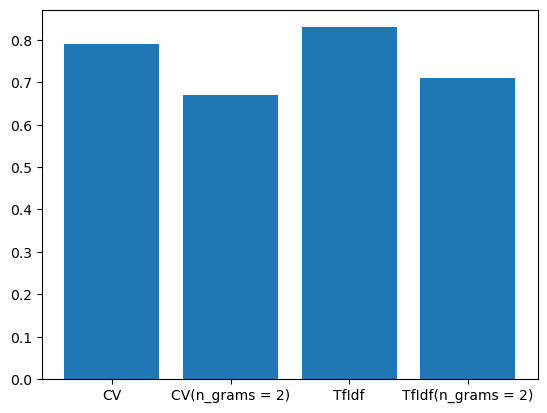

In [152]:
print("Model 1 : Decision Tree")
print("Accuracy with Count Vectorization (default) : " + str(dt_acc1))
print("Accuracy with Count Vectorization (using bigrams) : " + str(dt_acc2))
print("Accuracy with TfIdf Vectorization (default) : " + str(dt_acc3))
print("Accuracy with TfIdf Vectorization (using bigrams) : " + str(dt_acc4))
plt.bar(['CV', 'CV(n_grams = 2)', 'TfIdf', 'TfIdf(n_grams = 2)'], [dt_acc1, dt_acc2, dt_acc3, dt_acc4])
plt.show()

Model 2 : Random Forest
Accuracy with Count Vectorization (default) : 0.84
Accuracy with Count Vectorization (using bigrams) : 0.85
Accuracy with TfIdf Vectorization (default) : 0.84
Accuracy with TfIdf Vectorization (using bigrams) : 0.83


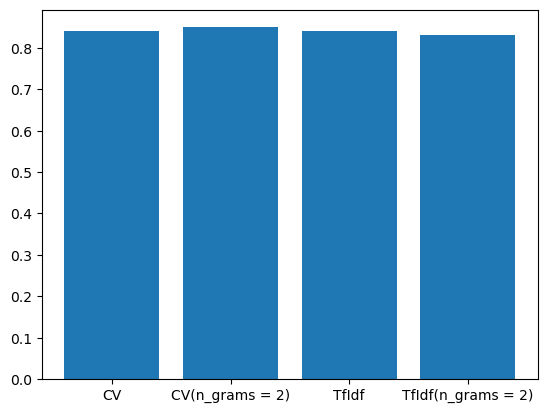

In [153]:
print("Model 2 : Random Forest")
print("Accuracy with Count Vectorization (default) : " + str(rf_acc1))
print("Accuracy with Count Vectorization (using bigrams) : " + str(rf_acc2))
print("Accuracy with TfIdf Vectorization (default) : " + str(rf_acc3))
print("Accuracy with TfIdf Vectorization (using bigrams) : " + str(rf_acc4))
plt.bar(['CV', 'CV(n_grams = 2)', 'TfIdf', 'TfIdf(n_grams = 2)'], [rf_acc1, rf_acc2, rf_acc3, rf_acc4])
plt.show()

Model 3 : KNN
Accuracy with Count Vectorization (default) : 0.85
Accuracy with Count Vectorization (using bigrams) : 0.85
Accuracy with TfIdf Vectorization (default) : 0.83
Accuracy with TfIdf Vectorization (using bigrams) : 0.83


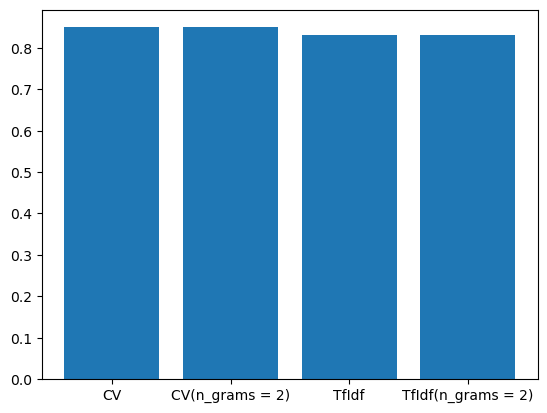

In [154]:
print("Model 3 : KNN")
print("Accuracy with Count Vectorization (default) : " + str(knn_acc1))
print("Accuracy with Count Vectorization (using bigrams) : " + str(knn_acc2))
print("Accuracy with TfIdf Vectorization (default) : " + str(knn_acc3))
print("Accuracy with TfIdf Vectorization (using bigrams) : " + str(knn_acc4))
plt.bar(['CV', 'CV(n_grams = 2)', 'TfIdf', 'TfIdf(n_grams = 2)'], [knn_acc1, knn_acc2, knn_acc3, knn_acc4])
plt.show()

Model 4 : SVM
Accuracy with Count Vectorization (default) : 0.84
Accuracy with Count Vectorization (using bigrams) : 0.85
Accuracy with TfIdf Vectorization (default) : 0.85
Accuracy with TfIdf Vectorization (using bigrams) : 0.85


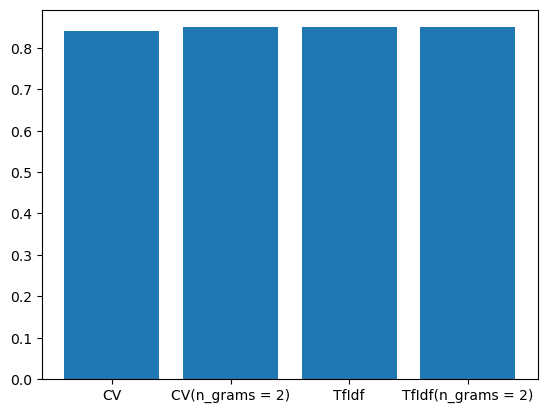

In [155]:
print("Model 4 : SVM")
print("Accuracy with Count Vectorization (default) : " + str(svm_acc1))
print("Accuracy with Count Vectorization (using bigrams) : " + str(svm_acc2))
print("Accuracy with TfIdf Vectorization (default) : " + str(svm_acc3))
print("Accuracy with TfIdf Vectorization (using bigrams) : " + str(svm_acc4))
plt.bar(['CV', 'CV(n_grams = 2)', 'TfIdf', 'TfIdf(n_grams = 2)'], [svm_acc1, svm_acc2, svm_acc3, svm_acc4])
plt.show()

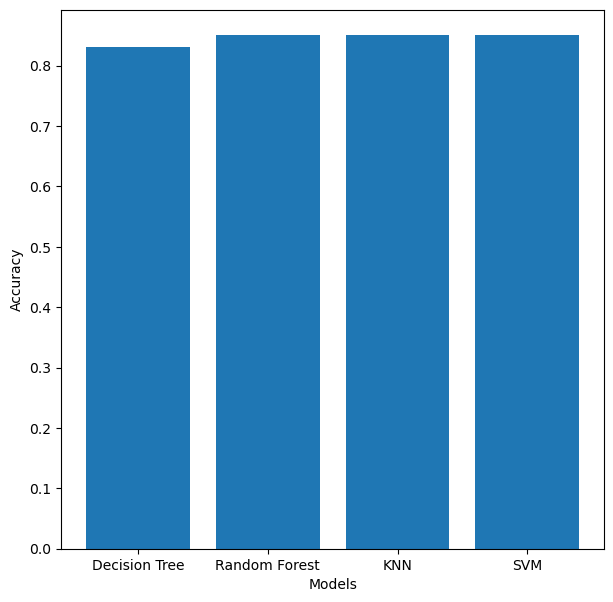

In [162]:
dt_acc = max([dt_acc1, dt_acc2, dt_acc3, dt_acc4])
rf_acc = max([rf_acc1, rf_acc2, rf_acc3, rf_acc4])
knn_acc = max([knn_acc1, knn_acc2, knn_acc3, knn_acc4])
svm_acc = max([svm_acc1, svm_acc2, svm_acc3, svm_acc4])
plt.figure(dpi=100,figsize=(7,7))
plt.bar(['Decision Tree', 'Random Forest', 'KNN',  'SVM'], [dt_acc, rf_acc, knn_acc, svm_acc])
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.savefig("1.jpg")
plt.show()

# 